# import libraries 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import cross_val_score, KFold


# load datasets

In [4]:
df = pd.read_csv('dataset.csv', encoding='latin-1')

#reading data in python

In [5]:
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",Botswana Pula(P),No,No,No,No,4,365,1500,4.9
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8


In [6]:
df.sample(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating
5924,303547,Tipu Sultan Chicken Point,1,New Delhi,"Near Batla House Bus Stand, Jamia Nagar, Near,...",New Friends Colony,"New Friends Colony, New Delhi",77.288558,28.564896,"Biryani, Mughlai",Indian Rupees(Rs.),No,No,No,No,1,27,250,3.2
6028,302272,Mikky Restaurant,1,New Delhi,"2-3, Ram Nagar Market, Paharganj, New Delhi",Paharganj,"Paharganj, New Delhi",77.217968,28.645747,North Indian,Indian Rupees(Rs.),No,No,No,No,2,18,800,2.8
75,6706211,Paribar,30,Sí£o Paulo,"Praí_a Dom Josí© Gaspar, 42, Repí_blica, Sí£o ...",Repí_blica,"Repí_blica, Sí£o Paulo",-46.641594,-23.546642,"Brazilian, Italian",Brazilian Real(R$),No,No,No,No,4,46,150,4.3
6967,18486878,Shama Chicken Corner,1,New Delhi,"Shop 3, Ring Road Market, Sarojni Nagar New Delhi",Sarojini Nagar,"Sarojini Nagar, New Delhi",77.193568,28.569475,Mughlai,Indian Rupees(Rs.),No,No,No,No,1,0,300,1.0
4228,18337922,Cake Me Up,1,New Delhi,"Q-6 B, 2nd Floor, Jangpura, New Delhi",Jangpura,"Jangpura, New Delhi",77.241548,28.579919,Bakery,Indian Rupees(Rs.),No,No,No,No,1,7,400,3.1


In [7]:
df.tail(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,Turkish Lira(TL),No,No,No,No,3,788,80,4.1
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",Turkish Lira(TL),No,No,No,No,3,1034,105,4.2
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",Turkish Lira(TL),No,No,No,No,4,661,170,3.7
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,Turkish Lira(TL),No,No,No,No,4,901,120,4.0
9550,5927402,Walter's Coffee Roastery,208,ÛÁstanbul,"CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...",Moda,"Moda, ÛÁstanbul",29.026016,40.984776,Cafe,Turkish Lira(TL),No,No,No,No,2,591,55,4.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Currency              9551 non-null   object 
 11  Has Table booking     9551 non-null   object 
 12  Has Online delivery   9551 non-null   object 
 13  Is delivering now     9551 non-null   object 
 14  Switch to order menu  9551 non-null   object 
 15  Price range          

In [9]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Price range,Votes,Average Cost for two,Rating
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1.804837,156.909748,1199.210763,2.891268
std,8.791521e+06,56.750546,41.467058,11.007935,0.905609,430.169145,16121.183073,1.128845
min,5.300000e+01,1.000000,-157.948486,-41.330428,1.000000,0.000000,0.000000,1.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,1.000000,5.000000,250.000000,2.500000
50%,6.004089e+06,1.000000,77.191964,28.570469,2.000000,31.000000,400.000000,3.200000
75%,1.835229e+07,1.000000,77.282006,28.642758,2.000000,131.000000,700.000000,3.700000
max,1.850065e+07,216.000000,174.832089,55.976980,4.000000,10934.000000,800000.000000,4.900000


# missing value treatment 

In [10]:
df['Cuisines'].isnull().sum()

np.int64(9)

In [11]:
df['Cuisines'].fillna('Unknown', inplace=True)

C:\Users\RAHUL\AppData\Local\Temp\ipykernel_15036\2626648470.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cuisines'].fillna('Unknown', inplace=True)


In [12]:
df['Cuisines'].isnull().sum()

np.int64(0)

In [13]:
df.duplicated('Rating').sum()

np.int64(9518)

In [14]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Votes                   0
Average Cost for two    0
Rating                  0
dtype: int64

In [15]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Price range', 'Votes',
       'Average Cost for two', 'Rating'],
      dtype='object')

In [16]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Votes                     int64
Average Cost for two      int64
Rating                  float64
dtype: object

In [17]:
df['City'].unique()

array(['Makati City', 'Mandaluyong City', 'Pasay City', 'Pasig City',
       'Quezon City', 'San Juan City', 'Santa Rosa', 'Tagaytay City',
       'Taguig City', 'Brasí_lia', 'Rio de Janeiro', 'Sí£o Paulo',
       'Albany', 'Armidale', 'Athens', 'Augusta', 'Balingup',
       'Beechworth', 'Boise', 'Cedar Rapids/Iowa City', 'Chatham-Kent',
       'Clatskanie', 'Cochrane', 'Columbus', 'Consort', 'Dalton',
       'Davenport', 'Des Moines', 'Dicky Beach', 'Dubuque',
       'East Ballina', 'Fernley', 'Flaxton', 'Forrest', 'Gainesville',
       'Hepburn Springs', 'Huskisson', 'Inverloch', 'Lakes Entrance',
       'Lakeview', 'Lincoln', 'Lorn', 'Macedon', 'Macon', 'Mayfield',
       'Mc Millan', 'Middleton Beach', 'Miller', 'Monroe', 'Montville',
       'Ojo Caliente', 'Orlando', 'Palm Cove', 'Paynesville', 'Penola',
       'Pensacola', 'Phillip Island', 'Pocatello', 'Potrero', 'Princeton',
       'Rest of Hawaii', 'Savannah', 'Singapore', 'Sioux City',
       'Tampa Bay', 'Tanunda', 'Trentha

#2.	Defining the problem statement = : Zomato, the online food app, has reached out to you to help them to predict how good or bad a restaurant will turn out in the future. So that, they can take a decision to include the restaurant in their app or remove it.

# identifying the target variable

In [18]:
print(df.columns)


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Price range', 'Votes',
       'Average Cost for two', 'Rating'],
      dtype='object')


In [19]:
df['Rating'].value_counts()

Rating
1.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64

In [20]:
df['Rating'].unique()

array([4.8, 4.5, 4.4, 4.9, 4. , 4.2, 4.3, 3.6, 4.7, 3. , 3.8, 3.7, 3.2,
       3.1, 1. , 4.1, 3.3, 4.6, 3.9, 3.4, 3.5, 2.2, 2.9, 2.4, 2.6, 2.8,
       2.1, 2.7, 2.5, 1.8, 2. , 2.3, 1.9])

In [21]:
df['Rating'].isnull().sum()

np.int64(0)

In [22]:
df['Rating'].duplicated().sum()

np.int64(9518)

In [23]:
print(df["Rating"].describe()) 


count    9551.000000
mean        2.891268
std         1.128845
min         1.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Rating, dtype: float64


# 4.	Looking at the distribution of Target variable

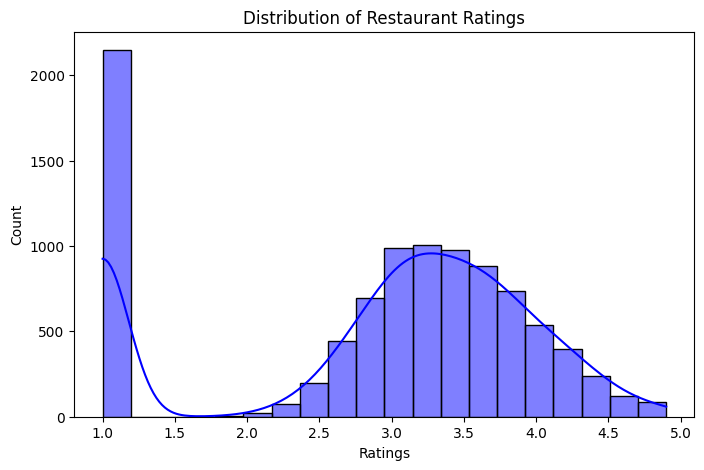

In [24]:
plt.figure(figsize=(8,5))  
sns.histplot(df["Rating"], bins=20, kde=True, color="blue")  
plt.xlabel("Ratings")  
plt.ylabel("Count")  
plt.title("Distribution of Restaurant Ratings")  
plt.show()  

(array([2148.,    0.,    0.,    0.,    3.,   22.,   74.,  197.,  441.,
         696.,  987., 1005.,  978.,  885.,  735.,  540.,  395.,  239.,
         120.,   86.]),
 array([1.   , 1.195, 1.39 , 1.585, 1.78 , 1.975, 2.17 , 2.365, 2.56 ,
        2.755, 2.95 , 3.145, 3.34 , 3.535, 3.73 , 3.925, 4.12 , 4.315,
        4.51 , 4.705, 4.9  ]),
 <BarContainer object of 20 artists>)

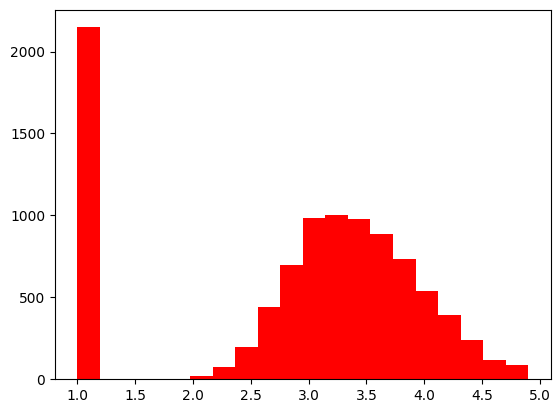

In [25]:
plt.hist(df['Rating'], bins=20, color='red')

<Figure size 800x1000 with 0 Axes>

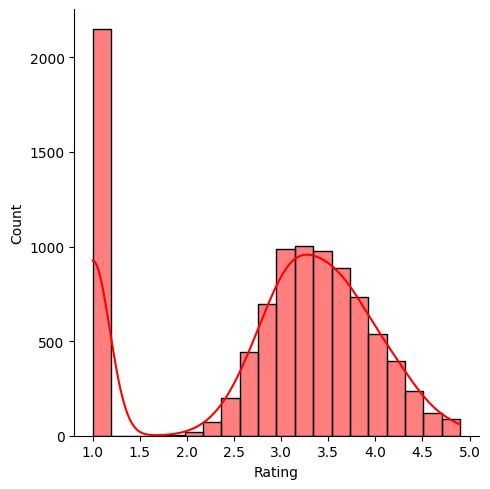

In [26]:
plt.figure(figsize=(8,10)) 
sns.displot(df['Rating'], bins=20, kde=True, color='red')

<Axes: ylabel='count'>

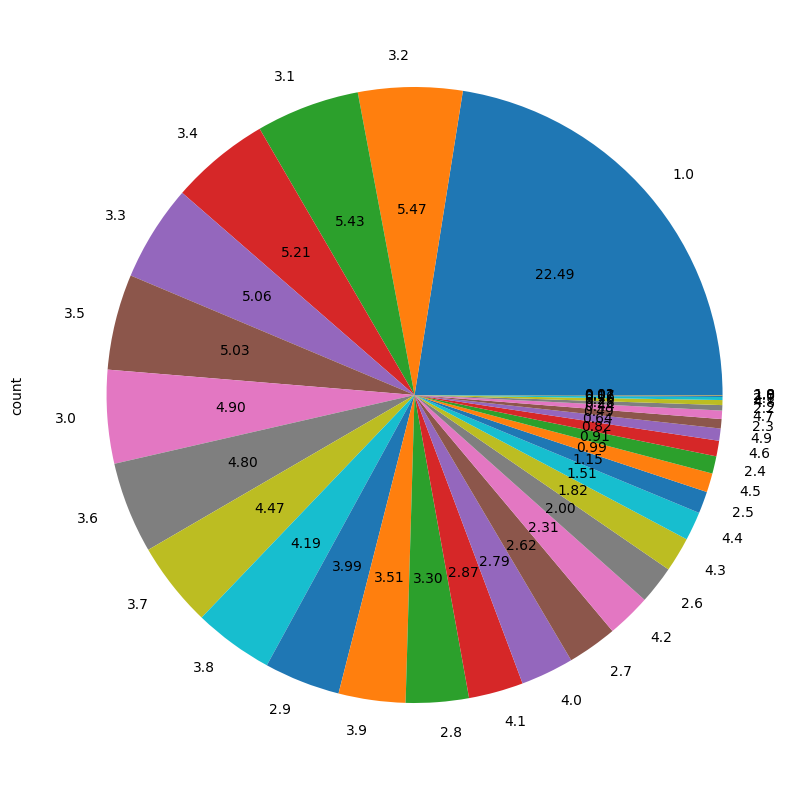

In [27]:
df['Rating'].value_counts().plot(kind = 'pie' , autopct = '%.2f', figsize = (10,10))

<Axes: ylabel='Rating'>

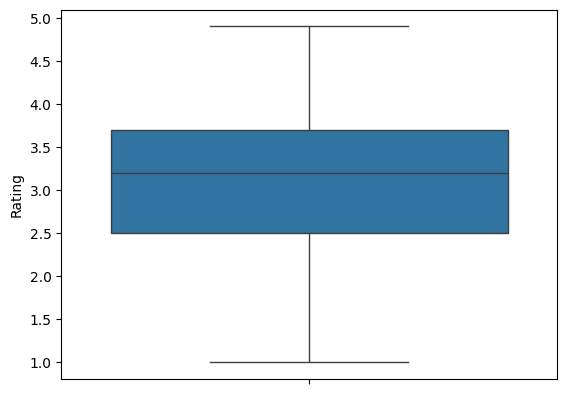

In [28]:
sns.boxplot(df['Rating'])

# Basic data exploration

In [29]:
##Check Basic Info & Data Types
#Check for Missing Values
#Check for Duplicates
#Summary Statistics (Numerical Features)
#Unique Values in Categorical Columns


# 6.	Feature Engineering

In [30]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Price range', 'Votes',
       'Average Cost for two', 'Rating'],
      dtype='object')

In [31]:
df.drop(columns=['Is delivering now'], inplace = True)

In [32]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Currency', 'Has Table booking', 'Has Online delivery',
       'Switch to order menu', 'Price range', 'Votes', 'Average Cost for two',
       'Rating'],
      dtype='object')

In [33]:
df['Cuisines'].shape

(9551,)

In [34]:
df['Country Code'].unique()

array([162,  30, 216,  14,  37, 184, 214,   1,  94, 148, 215, 166, 189,
       191, 208])

In [35]:
df['Country Code'].nunique()

15

In [36]:
df['Country Code'].value_counts()

Country Code
1      8652
216     434
215      80
30       60
189      60
214      60
148      40
208      34
14       24
162      22
94       21
166      20
184      20
191      20
37        4
Name: count, dtype: int64

In [37]:
mask = df['Country Code'] == 1
df = df[mask]

In [38]:
df.shape

(8652, 18)

# statical correlation analysis

In [39]:
df.select_dtypes(include=[np.number]).corr()

,Restaurant ID,Country Code,Longitude,Latitude,Price range,Votes,Average Cost for two,Rating
Restaurant ID,1.000000,NaN,-0.168817,-0.134865,-0.167328,-0.183609,-0.151737,-0.367418
Country Code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Longitude,-0.168817,NaN,1.000000,0.926769,0.042794,0.069092,0.060100,0.160768
Latitude,-0.134865,NaN,0.926769,1.000000,-0.037828,-0.040926,0.018604,0.064258
Price range,-0.167328,NaN,0.042794,-0.037828,1.000000,0.310859,0.837964,0.430693
Votes,-0.183609,NaN,0.069092,-0.040926,0.310859,1.000000,0.281765,0.322068
Average Cost for two,-0.151737,NaN,0.060100,0.018604,0.837964,0.281765,1.000000,0.364723
Rating,-0.367418,NaN,0.160768,0.064258,0.430693,0.322068,0.364723,1.000000


# reject useless columns 

In [40]:
df.drop(columns=['Country Code','Currency'], inplace = True)

In [41]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'City', 'Address', 'Locality',
       'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Has Table booking', 'Has Online delivery', 'Switch to order menu',
       'Price range', 'Votes', 'Average Cost for two', 'Rating'],
      dtype='object')

In [42]:
df.shape

(8652, 16)

In [43]:
df['City'].nunique()

43

In [44]:
df['City'].value_counts()


City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Guwahati          21
Lucknow           21
Bhubaneshwar      21
Ahmedabad         21
Amritsar          21
Allahabad         20
Varanasi          20
Coimbatore        20
Chennai           20
Bhopal            20
Aurangabad        20
Bangalore         20
Agra              20
Goa               20
Kolkata           20
Jaipur            20
Kochi             20
Kanpur            20
Mangalore         20
Ludhiana          20
Indore            20
Dehradun          20
Vizag             20
Pune              20
Mumbai            20
Mysore            20
Nashik            20
Nagpur            20
Patna             20
Puducherry        20
Ranchi            20
Vadodara          20
Surat             20
Chandigarh        18
Hyderabad         18
Secunderabad       2
Mohali             1
Panchkula          1
Name: count, dtype: int64

In [45]:
df['City'].unique()

array(['Agra', 'Ahmedabad', 'Allahabad', 'Amritsar', 'Aurangabad',
       'Bangalore', 'Bhopal', 'Bhubaneshwar', 'Chandigarh', 'Chennai',
       'Coimbatore', 'Dehradun', 'Faridabad', 'Ghaziabad', 'Goa',
       'Gurgaon', 'Guwahati', 'Hyderabad', 'Indore', 'Jaipur', 'Kanpur',
       'Kochi', 'Kolkata', 'Lucknow', 'Ludhiana', 'Mangalore', 'Mohali',
       'Mumbai', 'Mysore', 'Nagpur', 'Nashik', 'New Delhi', 'Noida',
       'Panchkula', 'Patna', 'Puducherry', 'Pune', 'Ranchi',
       'Secunderabad', 'Surat', 'Vadodara', 'Varanasi', 'Vizag'],
      dtype=object)

In [46]:
mask = df['City'].isin(['New Delhi','Gurgaon','Noida'])

In [47]:
df = df[mask]

In [48]:
df.drop(columns=['Restaurant Name','Address','Locality','Locality Verbose'], inplace = True)

In [49]:
df.shape

(7671, 12)

In [50]:
df['Switch to order menu'].nunique()

1

In [51]:
df['Switch to order menu'].value_counts()

Switch to order menu
No    7671
Name: count, dtype: int64

In [52]:
df.drop(columns=['Switch to order menu'],inplace=True)

In [53]:
df.shape

(7671, 11)

In [54]:
df['Has Table booking'].replace('yes',1,inplace=True)
df['Has Table booking'].replace('no',0,inplace=True)

C:\Users\RAHUL\AppData\Local\Temp\ipykernel_15036\1440273459.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Has Table booking'].replace('yes',1,inplace=True)
C:\Users\RAHUL\AppData\Local\Temp\ipykernel_15036\1440273459.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [55]:
df['Has Table booking'].value_counts()

Has Table booking
No     6640
Yes    1031
Name: count, dtype: int64

In [56]:
df['Has Online delivery'].value_counts()

Has Online delivery
No     5393
Yes    2278
Name: count, dtype: int64

In [57]:
df.drop(columns=['Longitude','Latitude','Price range','Has Online delivery'],inplace=True)

In [58]:
df.columns

Index(['Restaurant ID', 'City', 'Cuisines', 'Has Table booking', 'Votes',
       'Average Cost for two', 'Rating'],
      dtype='object')

In [59]:
df

,Restaurant ID,City,Cuisines,Has Table booking,Votes,Average Cost for two,Rating
1161,18396451,Gurgaon,"Cafe, Beverages",No,16,350,3.4
1162,18237941,Gurgaon,"North Indian, Mughlai",Yes,80,800,2.7
1163,2787,Gurgaon,"North Indian, Mughlai",Yes,1887,2000,4.3
1164,3431,Gurgaon,"South Indian, Seafood, Kerala",Yes,802,1400,4.0
1165,303699,Gurgaon,Bakery,No,4,250,3.0
...,...,...,...,...,...,...,...
9108,18255134,Noida,"North Indian, Chinese",No,34,700,2.6
9109,18277023,Noida,Fast Food,No,1,400,1.0
9110,18313203,Noida,Fast Food,No,3,600,1.0
9111,18254559,Noida,"North Indian, Chinese",No,0,500,1.0


# converting data into numeric 

In [60]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["Has Table booking"] = label_encoder.fit_transform(df["Has Table booking"])

In [61]:
df

,Restaurant ID,City,Cuisines,Has Table booking,Votes,Average Cost for two,Rating
1161,18396451,Gurgaon,"Cafe, Beverages",0,16,350,3.4
1162,18237941,Gurgaon,"North Indian, Mughlai",1,80,800,2.7
1163,2787,Gurgaon,"North Indian, Mughlai",1,1887,2000,4.3
1164,3431,Gurgaon,"South Indian, Seafood, Kerala",1,802,1400,4.0
1165,303699,Gurgaon,Bakery,0,4,250,3.0
...,...,...,...,...,...,...,...
9108,18255134,Noida,"North Indian, Chinese",0,34,700,2.6
9109,18277023,Noida,Fast Food,0,1,400,1.0
9110,18313203,Noida,Fast Food,0,3,600,1.0
9111,18254559,Noida,"North Indian, Chinese",0,0,500,1.0


In [62]:
df["Cuisines"] = label_encoder.fit_transform(df["Cuisines"])

In [63]:
df["City"] = label_encoder.fit_transform(df["City"])

In [64]:
df

,Restaurant ID,City,Cuisines,Has Table booking,Votes,Average Cost for two,Rating
1161,18396451,0,158,0,16,350,3.4
1162,18237941,0,932,1,80,800,2.7
1163,2787,0,932,1,1887,2000,4.3
1164,3431,0,1082,1,802,1400,4.0
1165,303699,0,69,0,4,250,3.0
...,...,...,...,...,...,...,...
9108,18255134,2,787,0,34,700,2.6
9109,18277023,2,473,0,1,400,1.0
9110,18313203,2,473,0,3,600,1.0
9111,18254559,2,787,0,0,500,1.0


# 7 visual exporatory data analyis (heatmap, barchart)

<Axes: xlabel='City', ylabel='Rating'>

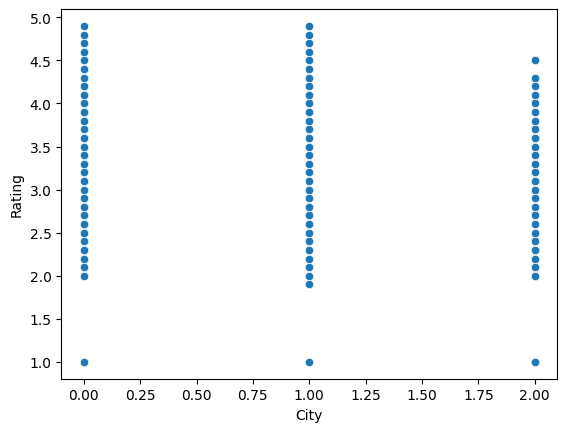

In [65]:
sns.scatterplot(x = df['City'], y = df['Rating'])

<Axes: xlabel='City', ylabel='Rating'>

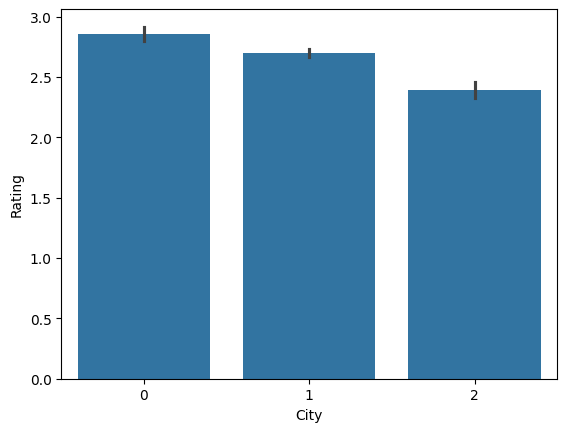

In [66]:
sns.barplot(x = df['City'], y = df['Rating'])

<Axes: xlabel='City', ylabel='Rating'>

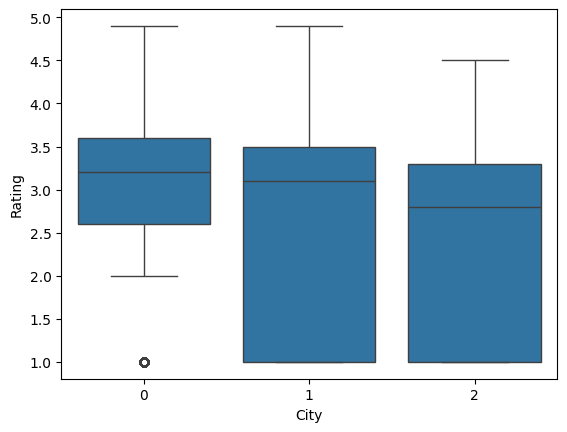

In [67]:
sns.boxplot(x = df['City'], y = df['Rating'])

<Axes: ylabel='Cuisines'>

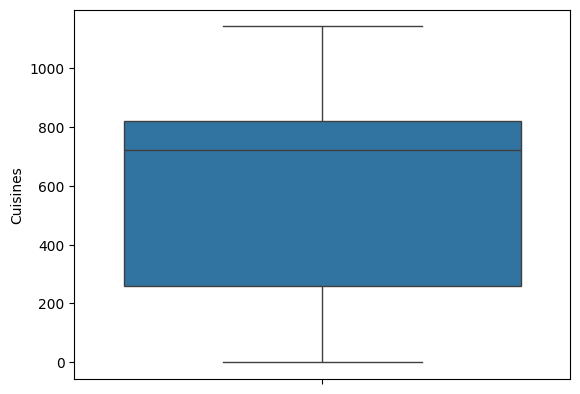

In [68]:
sns.boxplot(df['Cuisines'])

In [69]:
pd.crosstab(df['City'],df['Rating'])

Rating,1.0,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,...,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9
City,,,,,,,,,,,,,,,,,,,,,
0,228,0,1,2,8,6,17,13,18,34,...,33,24,11,9,6,3,5,1,2,1
1,1425,2,2,8,14,25,46,64,129,170,...,89,84,64,32,31,11,8,5,1,3
2,384,0,4,4,3,15,19,29,35,32,...,9,10,3,5,0,2,0,0,0,0


<Axes: >

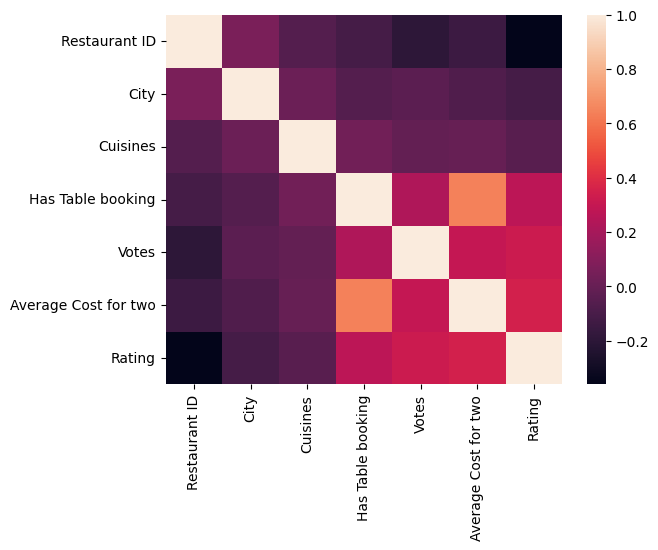

In [70]:
sns.heatmap(df.corr())

# visual correlational analysis 

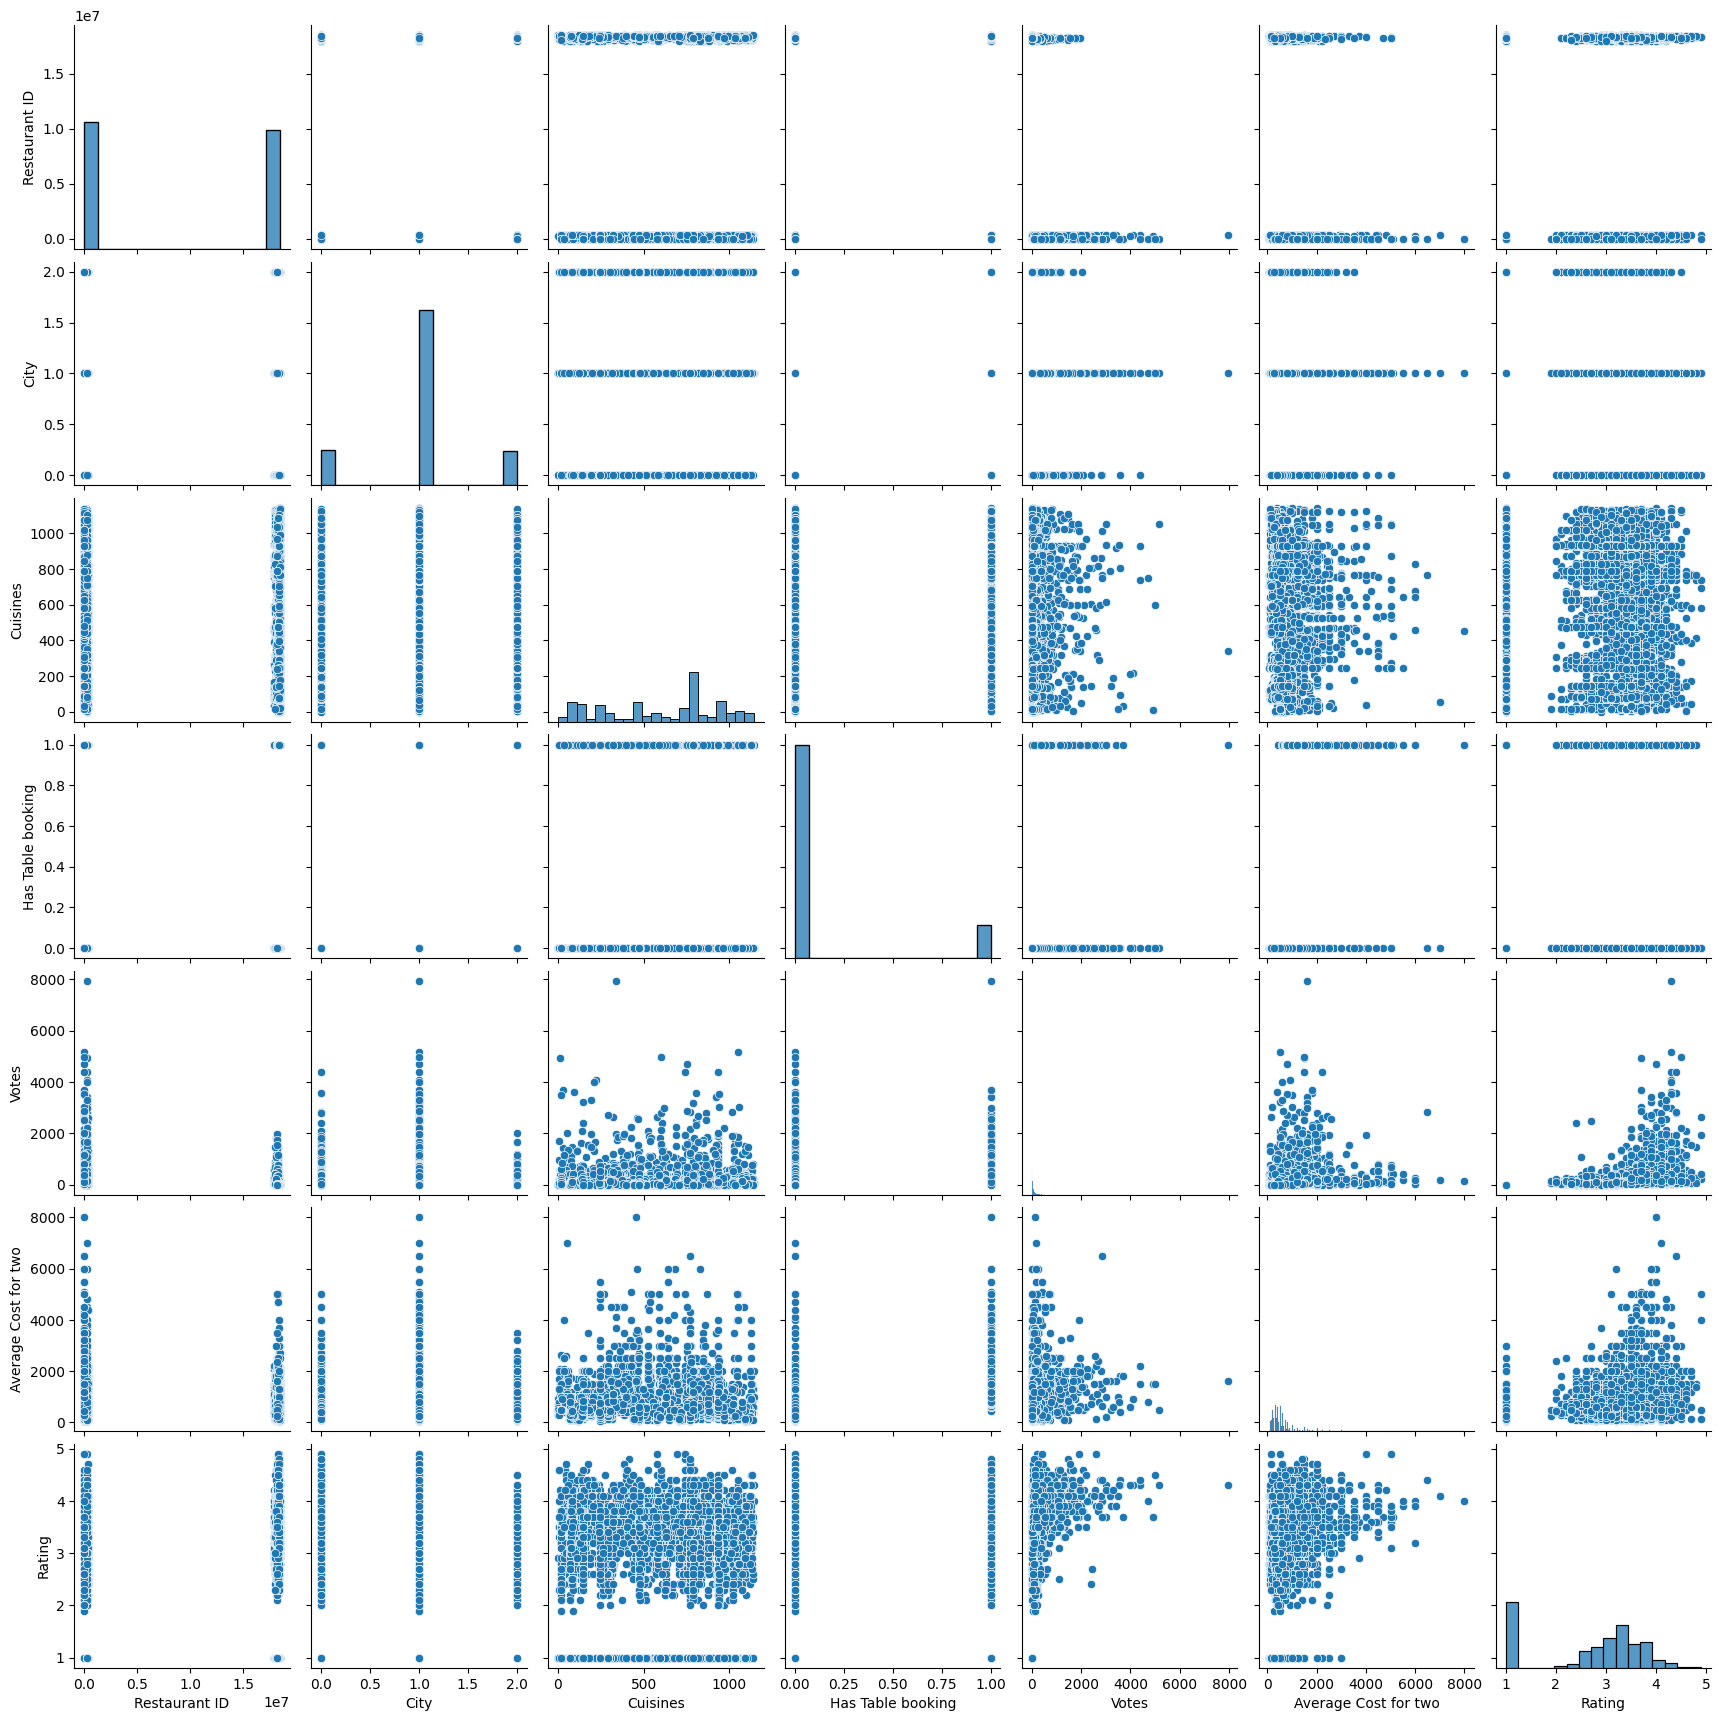

In [71]:
sns.pairplot(df)

In [72]:
X = df.drop(columns=['Rating'])
y = df['Rating']

In [73]:
from sklearn.model_selection import train_test_split # Import train_test_split from the correct module
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=9)

In [74]:
X_train.shape

(6136, 6)

In [75]:
y_train.shape

(6136,)

In [76]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [77]:
regressor.fit(X_train,y_train)

LinearRegression()

In [78]:
y_pred = regressor.predict(X_test)

In [79]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.2883319836713062

In [80]:
from sklearn.ensemble import RandomForestRegressor
regressor1 = RandomForestRegressor(n_estimators=200)

In [81]:
regressor1.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200)

In [82]:
y_pred1 = regressor1.predict(X_test)

In [83]:
r2_score(y_test,y_pred1)

0.9285888031870233

# sampling and K-fold cross validation 

In [84]:
np.mean(cross_val_score(regressor1,X,y,cv=5,scoring='r2'))

np.float64(0.9321830167676151)

In [85]:
import pickle

# Save the RandomForestRegressor model
pickle.dump(regressor1, open('model.pkl', 'wb'))